In [329]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [330]:
batch_size = 64
epochs = 30
lr = 0.01
train_ratio = 0.9

In [331]:
Train_df = pd.read_csv('train.csv',index_col=0)
Test_df  = pd.read_csv('test.csv',index_col=0)
print([Train_df.shape,Test_df.shape])

[(7160, 183), (1791, 182)]


In [332]:
y= (Train_df['class']).values
Train_df1= Train_df.drop('class',axis='columns')

In [333]:
Concat= pd.concat([Train_df1,Test_df],axis='rows')
Concat_1= Concat.drop(['appearedHour','appearedMinute'],axis='columns')

In [334]:
All=pd.get_dummies(Concat_1)
All.shape

(8951, 296)

In [335]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
All_Scale= Scaler.fit_transform(All)
All_Scale.shape

(8951, 296)

In [336]:
All_Scale1= pd.DataFrame(All_Scale)

In [337]:
Test_df1 = All_Scale1.iloc[7160:,:]
X=(All_Scale1.iloc[0:7160,:]).values
print([X.shape,Test_df1.shape])

[(7160, 296), (1791, 296)]


In [338]:
from tensorflow.keras.layers import Dense,Dropout

In [339]:
model = tf.keras.Sequential()
model.add(Dense(256, activation='relu', input_shape=(296,)))
model.add(Dropout(0.5))
model.add(Dense(190, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax')) 

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 256)               76032     
_________________________________________________________________
dropout_63 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 190)               48830     
_________________________________________________________________
dropout_64 (Dropout)         (None, 190)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 150)               28650     
_________________________________________________________________
dropout_65 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 100)               15100     
__________

In [340]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [341]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [342]:
Model_History = model.fit(x=X , y=y_binary,
                          batch_size= batch_size,
                          epochs= epochs,
                          validation_split= 1 - train_ratio)

Train on 6444 samples, validate on 716 samples
Epoch 1/30
6444/6444 [==============================] - 2s 284us/step - loss: 1.7515 - acc: 0.2149 - val_loss: 1.6000 - val_acc: 0.3254
Epoch 2/30
6444/6444 [==============================] - 1s 84us/step - loss: 1.5471 - acc: 0.3520 - val_loss: 1.3868 - val_acc: 0.4581
Epoch 3/30
6444/6444 [==============================] - 1s 81us/step - loss: 1.4184 - acc: 0.4215 - val_loss: 1.3075 - val_acc: 0.4902
Epoch 4/30
6444/6444 [==============================] - 1s 87us/step - loss: 1.3581 - acc: 0.4524 - val_loss: 1.2744 - val_acc: 0.4916
Epoch 5/30
6444/6444 [==============================] - 1s 82us/step - loss: 1.3207 - acc: 0.4809 - val_loss: 1.2704 - val_acc: 0.4958
Epoch 6/30
6444/6444 [==============================] - 1s 82us/step - loss: 1.2814 - acc: 0.4932 - val_loss: 1.2276 - val_acc: 0.5209
Epoch 7/30
6444/6444 [==============================] - 1s 85us/step - loss: 1.2490 - acc: 0.5081 - val_loss: 1.2289 - val_acc: 0.5265
Epoch 8

In [343]:
train_loss = Model_History.history['loss']
train_acc = Model_History.history['acc']
valid_loss = Model_History.history['val_loss']
valid_acc = Model_History.history['val_acc']

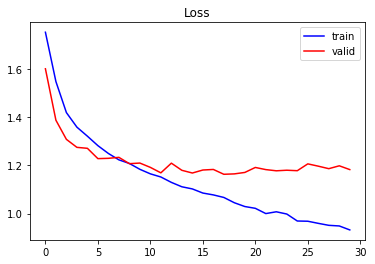

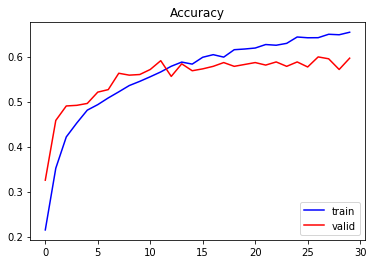

In [344]:
plt.plot(train_loss, 'b', label='train')
plt.plot(valid_loss, 'r', label='valid')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(train_acc, 'b', label='train')
plt.plot(valid_acc, 'r', label='valid')
plt.legend(loc=4)
plt.title("Accuracy")
plt.show()

In [345]:
from sklearn.metrics import accuracy_score

In [346]:
y_predict = model.predict_classes(Test_df1)
y_predict.shape

(1791,)

In [347]:
Result = pd.read_csv('sample_submission.csv')
Result['class'] = (y_predict)
Result.to_csv('Result.csv',index=False)